<a href="https://colab.research.google.com/github/leeseunghwan0409/AIFFEL_Online_Quest/blob/main/Main_Quest02-01/Main_Quest02_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main_Quest 02
## 학습목표 및 목차
 - 학습목표
  - 다양한 피처가 있는 데이터셋을 확인하고, 전설의 포켓몬을 분류하기 위한 피처에는 무엇이 있는지 확인
  - 모델 학습 전 모든 컬럼에 대해 그래프 시각화, 피벗 테이블 등을 활용하여 EDA를 진행
  - 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 원-핫 인코딩으로 진행
  - 전체 데이터셋을 train/test 데이터 셋으로 나누고, 분류모델을 선택해 학습시키며 베이스라인과 비교

 - 목차
  1. 포켓몬 데이터 구하기   
  (1) 포켓몬 데이터 불러오기   
  
  2. 데이터 살펴보기   
  (1) 결측치와 전체 칼럼   
  (2) ID와 이름   
  (3) 포켓몬의 속성   
  (4) 모든 스탯의 총합   
  (5) 세부 스탯   
  (6) 세대   
   
  3. 데이터 차이점 확인하기   
  (1) 전설의 포켓몬의 Total값   
  (2) 전설의 포켓몬의 이름   
   
  4. 데이터 전처리하기   
  (1) 이름의 길이가 10 이상인가?   
  (2) 이름에 자주 쓰이는 토큰 추출   
  (3) Type 1 & 2! 범주형 데이터 전처리하기   
   
  5. 모델 학습   
  (1) 가장 기본 데이터로 만드는 베이스라인   
  (2) 의사 결정 트리 모델 학습시키기    
  (3) 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?   
  (4) 의사 결정 트리 모델 다시 학습시키기   

### 1. 포켓몬 데이터 구하기
 - 이번 Quest를 진행함에 있어서 사용한 라이브러리를 불러온다.




In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

 - 데이터셋을 pandas로 불러오기


In [135]:
# 데이터셋을 pandas로 불러오기
import os
csv_path = os.getenv("HOME") +"/content/drive/MyDrive/Colab Notebooks/Pokemon.csv"
original_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")

 - 오류가 안 났다면 잘 불러와진 것을 확인할 수 있다.
---

 - `pokemon` 변수에 데이터를 저장하고, pandas 데이터로 확인해보기

In [3]:
# 데이터를 변수에 저장하고 pandas로 데이터 나타내보기
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


---

 - target으로 두고 확인할 데이터 중 전설의 포켓몬은 `legendary`변수에 일반 포켓몬은 `ordinary` 변수에 저장을 해본다.


In [4]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


 - 각각의 변수에 저장이 잘 되어진것을 확인할 수 있다.

---

### 2. 데이터 살펴보기
  1. 결측치와 전체 컬럼
    - 빈데이터 확인하기

In [6]:
# 빈 데이터 확인하기
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

 - "Type 2"에 386개의 결측치를 확인할 수 있다.


---

  1. 결측치와 전체 컬럼
    - 전체 컬럼 이해하기

In [7]:
# 전체 컬럼 이해하기
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

 - 13개의 컬럼을 확인할 수 있다.

---

  2. ID와 이름
    - `#`**:** ID number

In [8]:
# 몇 종류의 "#"값이 있는지 확인 (#:ID number)
len(set(pokemon["#"]))

721

In [9]:
# 같은 "#"값을 가지는 포켓몬을 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


 - 위 데이터에서 721개 종류의 `#`값이 있으며 같은 `#`을 가지는 포켓몬을 확인할 수 있다.

---

  2. ID와 이름
    - `Name`**:** 이름

In [10]:
# 몇 종류의 포켓몬 이름이 있는지 확인 (Name: 이름)
len(set(pokemon["Name"]))

800

In [11]:
# 데이터셋에서 각 포켓몬의 속성을 확인 (무작위 두 마리)
pokemon.loc[[4, 12]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


 - 위 데이터에서 800개의 이름이 있는것을 확인할 수 있다.
 - 아래 예시는 무작위 두 마리를 나타낸 것이다.

---

  3. 포켓몬의 속성
    - `Type 1 & type 2`**:** 포켓몬의 속성

In [12]:
# 각 속성의 종류는 총 몇 가지인지 확인
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

 - Type 1은 18개의 타입이 있는 것을 확인할 수 있고,   
 Type 2는 19개의 타입이 있는 것을 확인할 수 있다.

In [13]:
# 각자를 집합으로 만들어 차집합을 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

 - 차이나는 부분은 각자의 집합으로 변환 후 차집합으로 확인할 수 있다.

In [14]:
# 포켓몬들의 모든 Type을 'tpyes'변수에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ice', 'Normal', 'Ground', 'Rock', 'Ghost', 'Steel', 'Flying', 'Dark', 'Grass', 'Poison', 'Water', 'Bug', 'Fire', 'Fairy', 'Dragon', 'Fighting', 'Electric', 'Psychic']


 - 이제 모든 타입을 `types`라는 변수에 저장을 한다.

In [15]:
# 데이터가 비어있는 'NaN'값의 개수를 확인하고 싶을 때는 'isna()'함수 활용
pokemon["Type 2"].isna().sum()

386

 - `Type 2` 데이터에서 비어있는 `NaN`값을 확인하였을 때 386개가 나오는 것을 볼 수 있다.

---

  3. 포켓몬의 속성    
    - `Type 1` 데이터 분포 plot

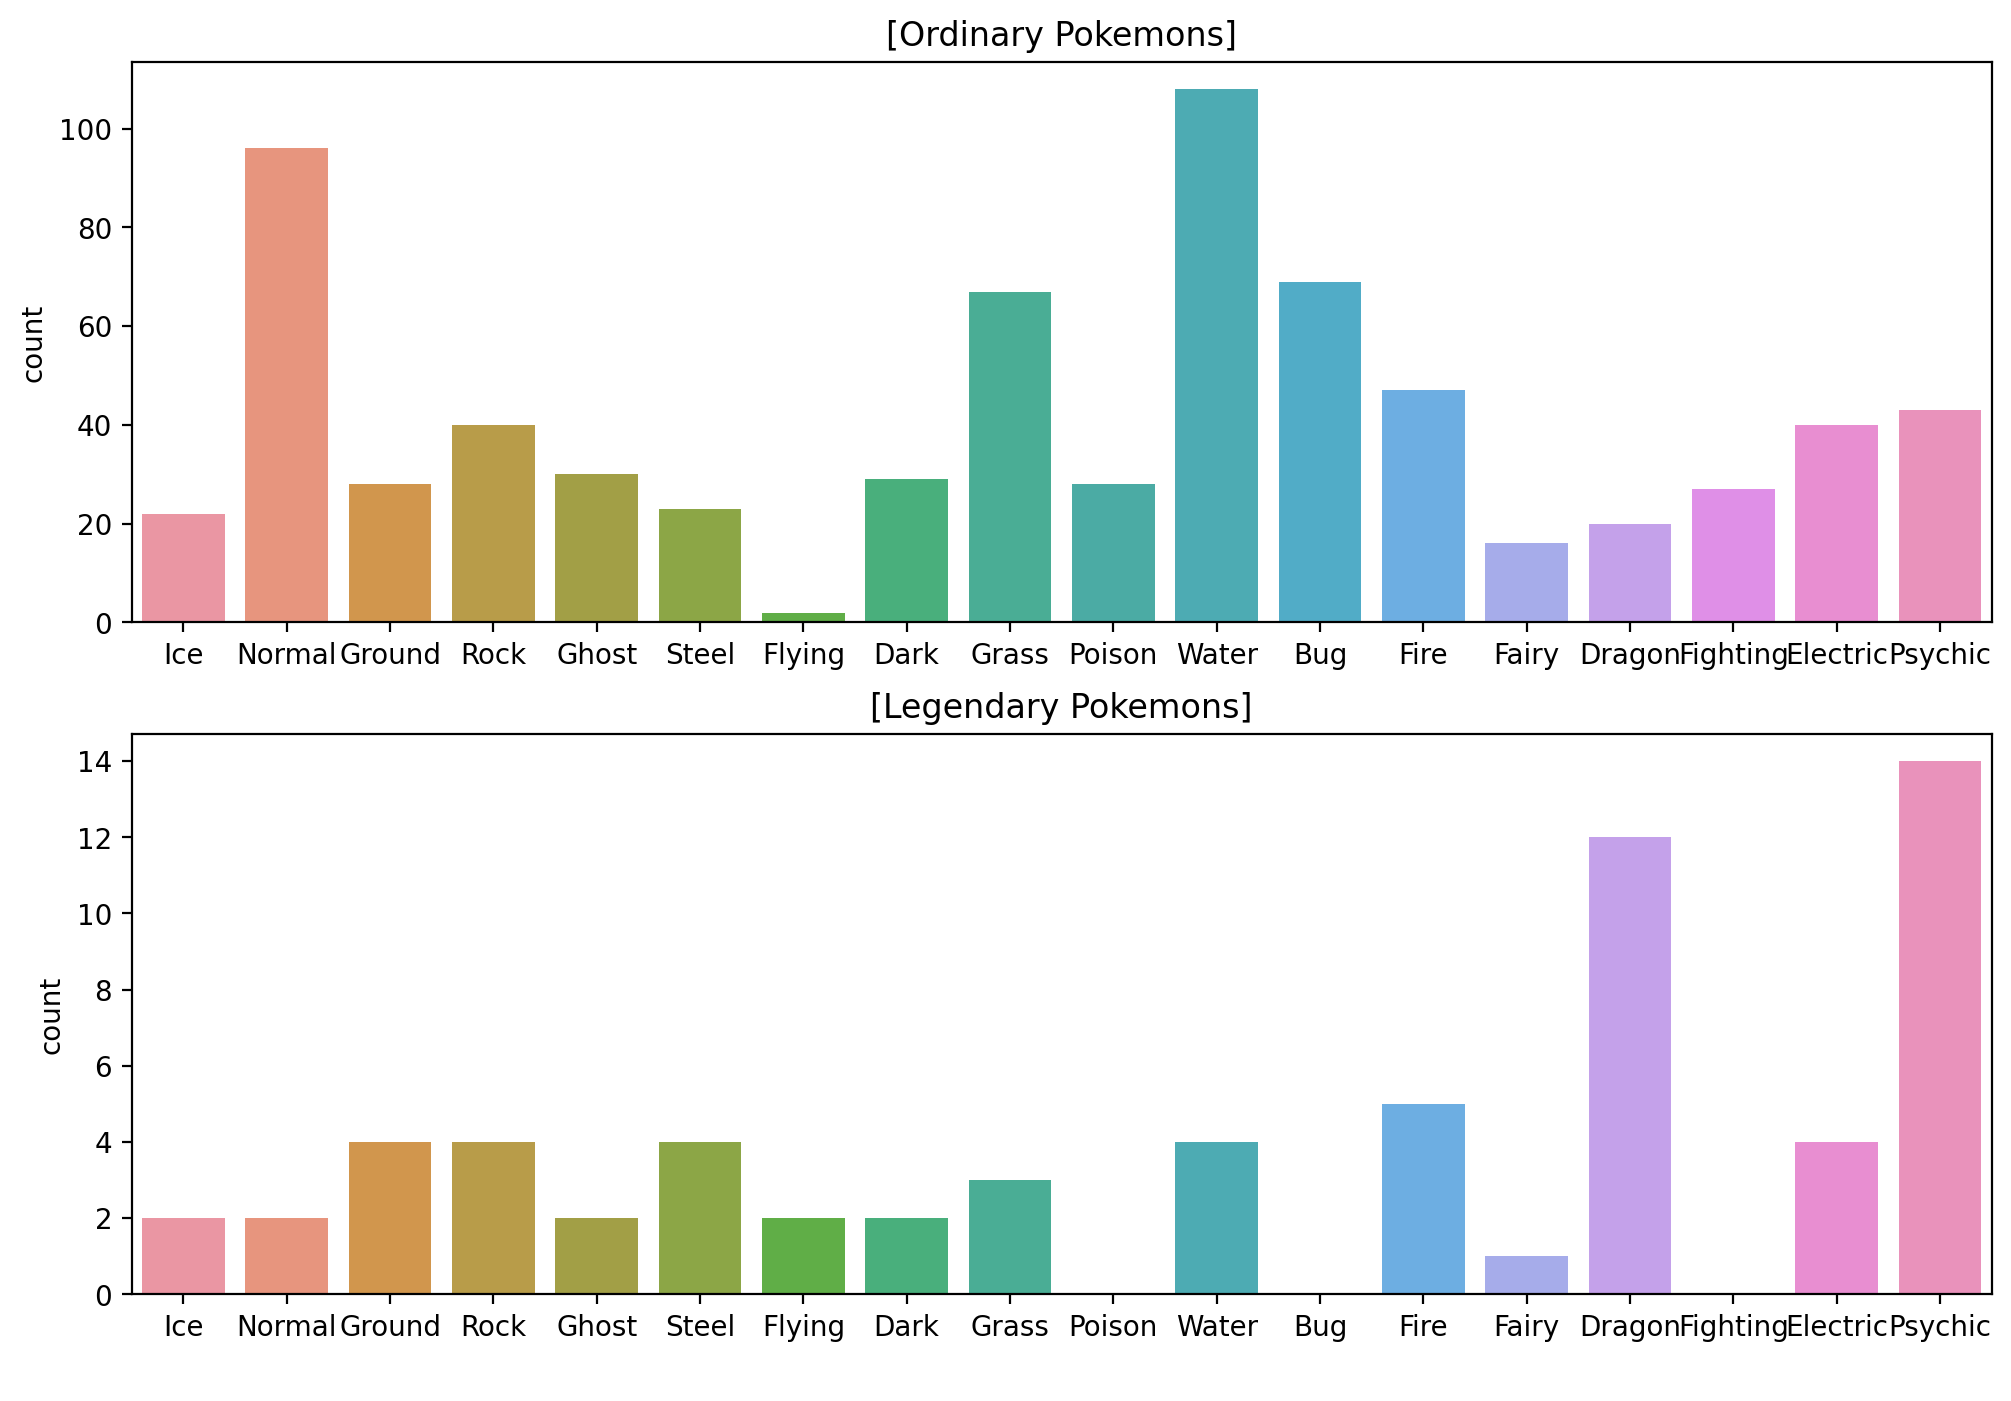

In [16]:
# 일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인 ('Type 1')
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel(' ')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel(' ')
plt.title("[Legendary Pokemons]")

plt.show()

 - 위 그래프는 `Type 1`의 데이터 분포를 plot하여 보여지고 있다.


In [17]:
# Type 1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


 - 위 피벗 테이블은 `Type 1`의 비율을 나타내고 있다.

  3. 포켓몬의 속성    
    - `Type 2` 데이터 분포 plot

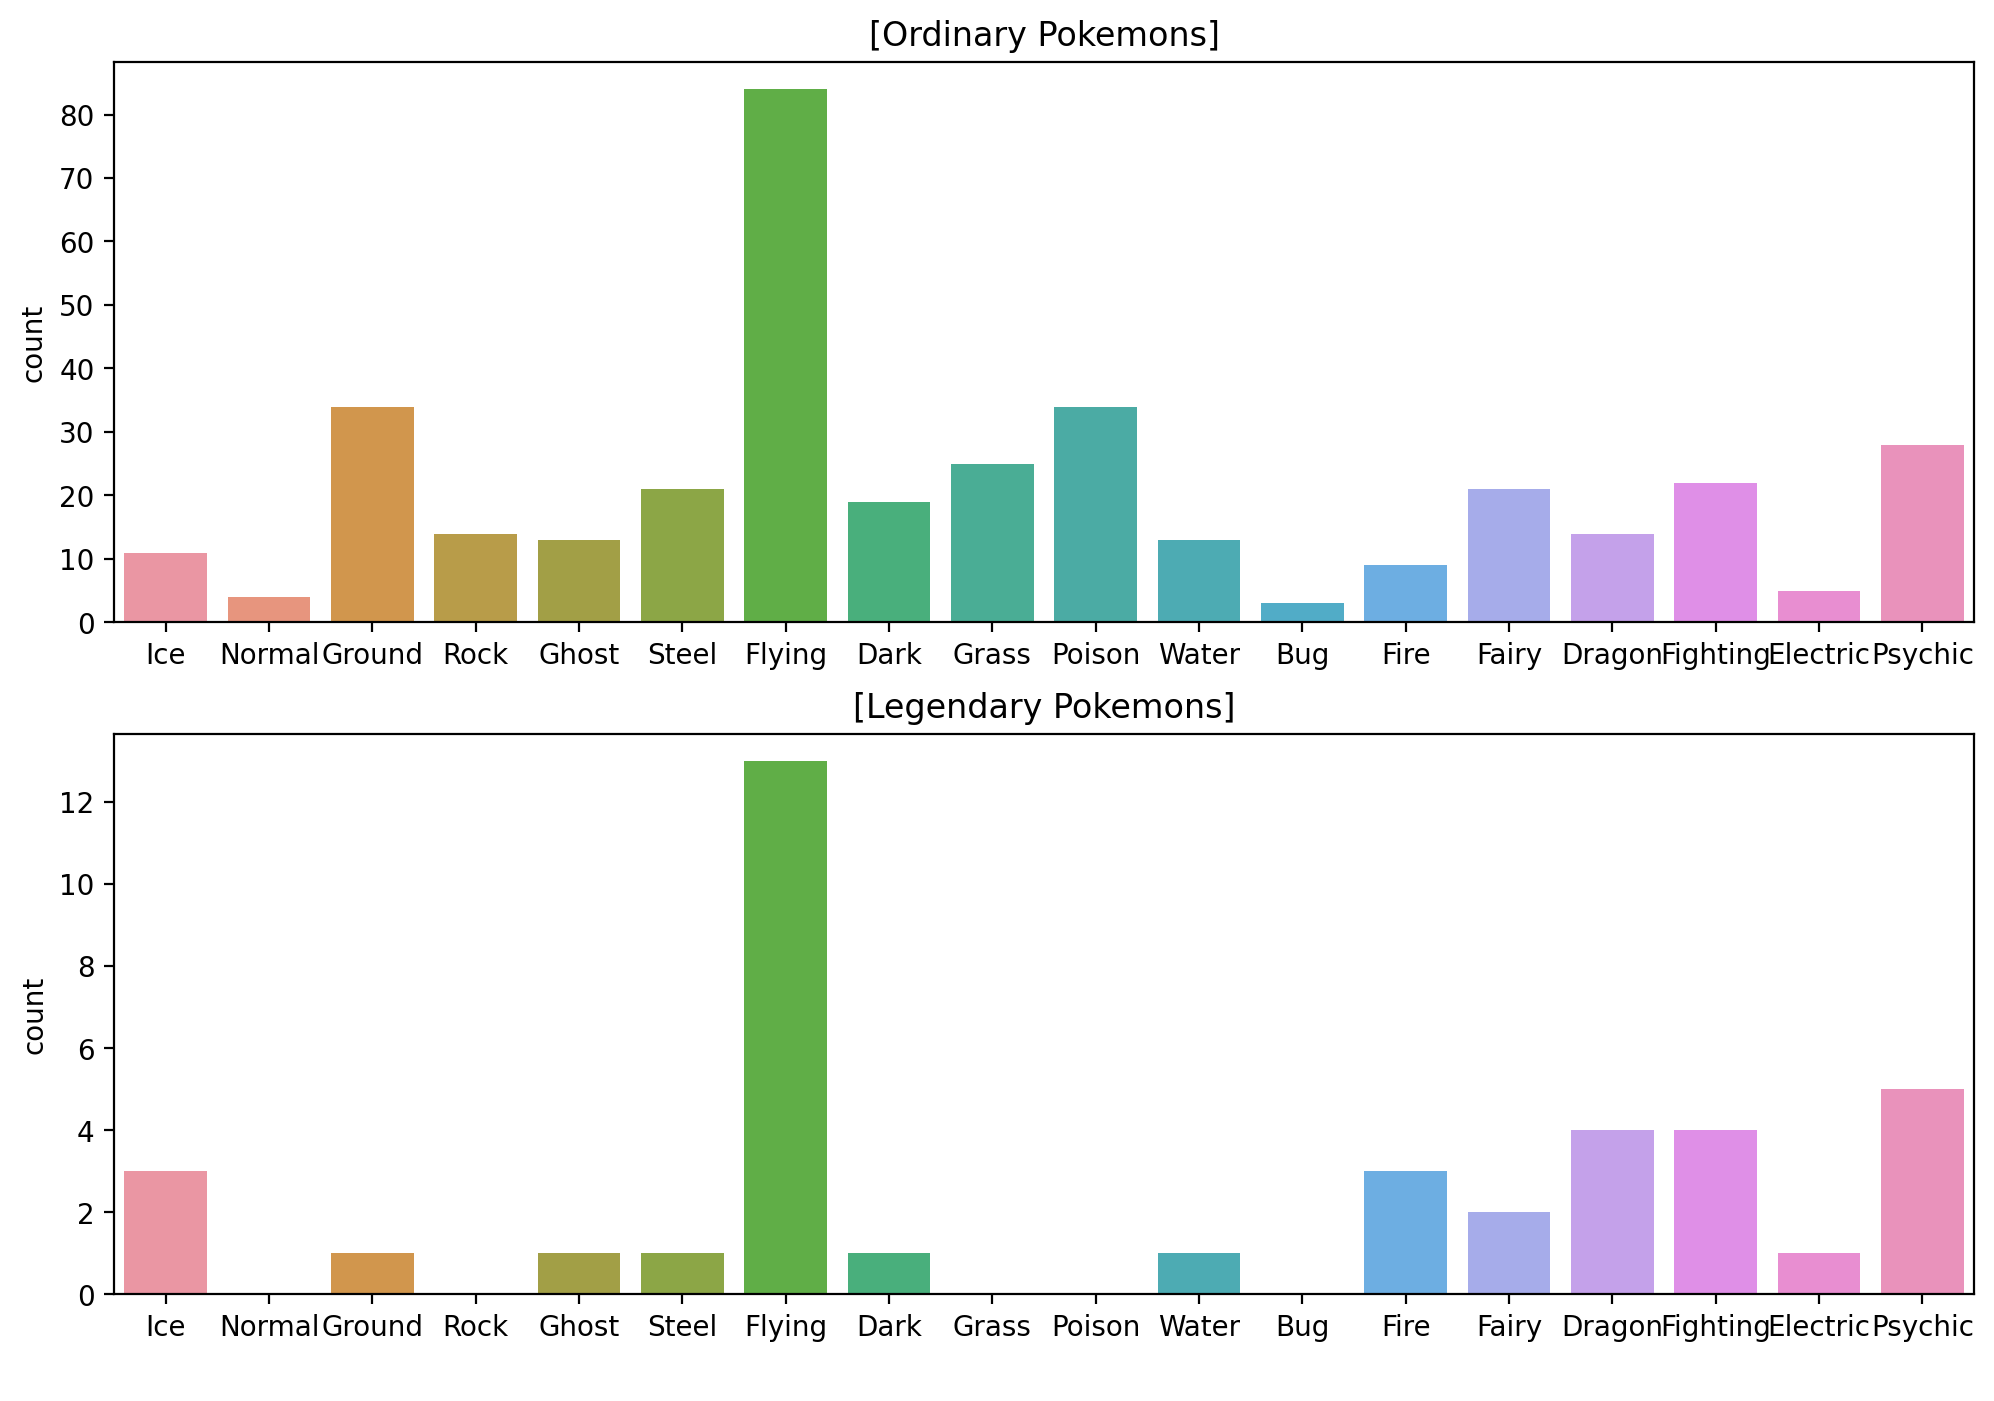

In [18]:
# 일반 포켓몬과 전설의 포켓몬 속성 분포가 각각 어떤지 확인 ('Type 2')
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel(' ')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel(' ')
plt.title("[Legendary Pokemons]")

plt.show()

 - 위 그래프는 `Type 2`의 데이터 분포를 plot하여 보여지고 있다.

In [19]:
# Type 2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


 - 위 피벗 테이블은 `Type 2`의 비율을 나타내고 있다.

---

  4. 모든 스탯의 총합
    - `Total`**:** 모든 스탯의 총합

In [20]:
# 모든 스탯의 종류를 'stats'라는 변수에 저장 (Total: 모든 스탯의 총합)
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

 - 모든 스탯의 종류가 `stats` 변수에 저장된 것을 확인할 수 있다.

In [21]:
# 6개의 스탯의 총합과 데이터에 제공된 'Total' 값이 맞는지 확인
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


 - 첫 번째 포켓몬에 대해 검증을 했을 시 `Total`값이 일치하는 것을 확인할 수 있다.

In [65]:
# 전체 포켓몬에 대해 'Total'값이 'stats'의 총합과 같은지 확인
count = sum(pokemon["Total"].values == pokemon[stats].values.sum(axis=1))
print("Total 값과 stats의 총합이 같은 포켓몬의 수는: ", count)

Total 값과 stats의 총합이 같은 포켓몬의 수는:  800


 - `Total`값과 모든 `stats`의 총합이 같은 포켓몬은 전체 데이터의 수와 같은 800마리인것을 확인할 수 있다.

---

  4. 모든 스탯의 총합
    - `Total`값에 따른 분포 plot

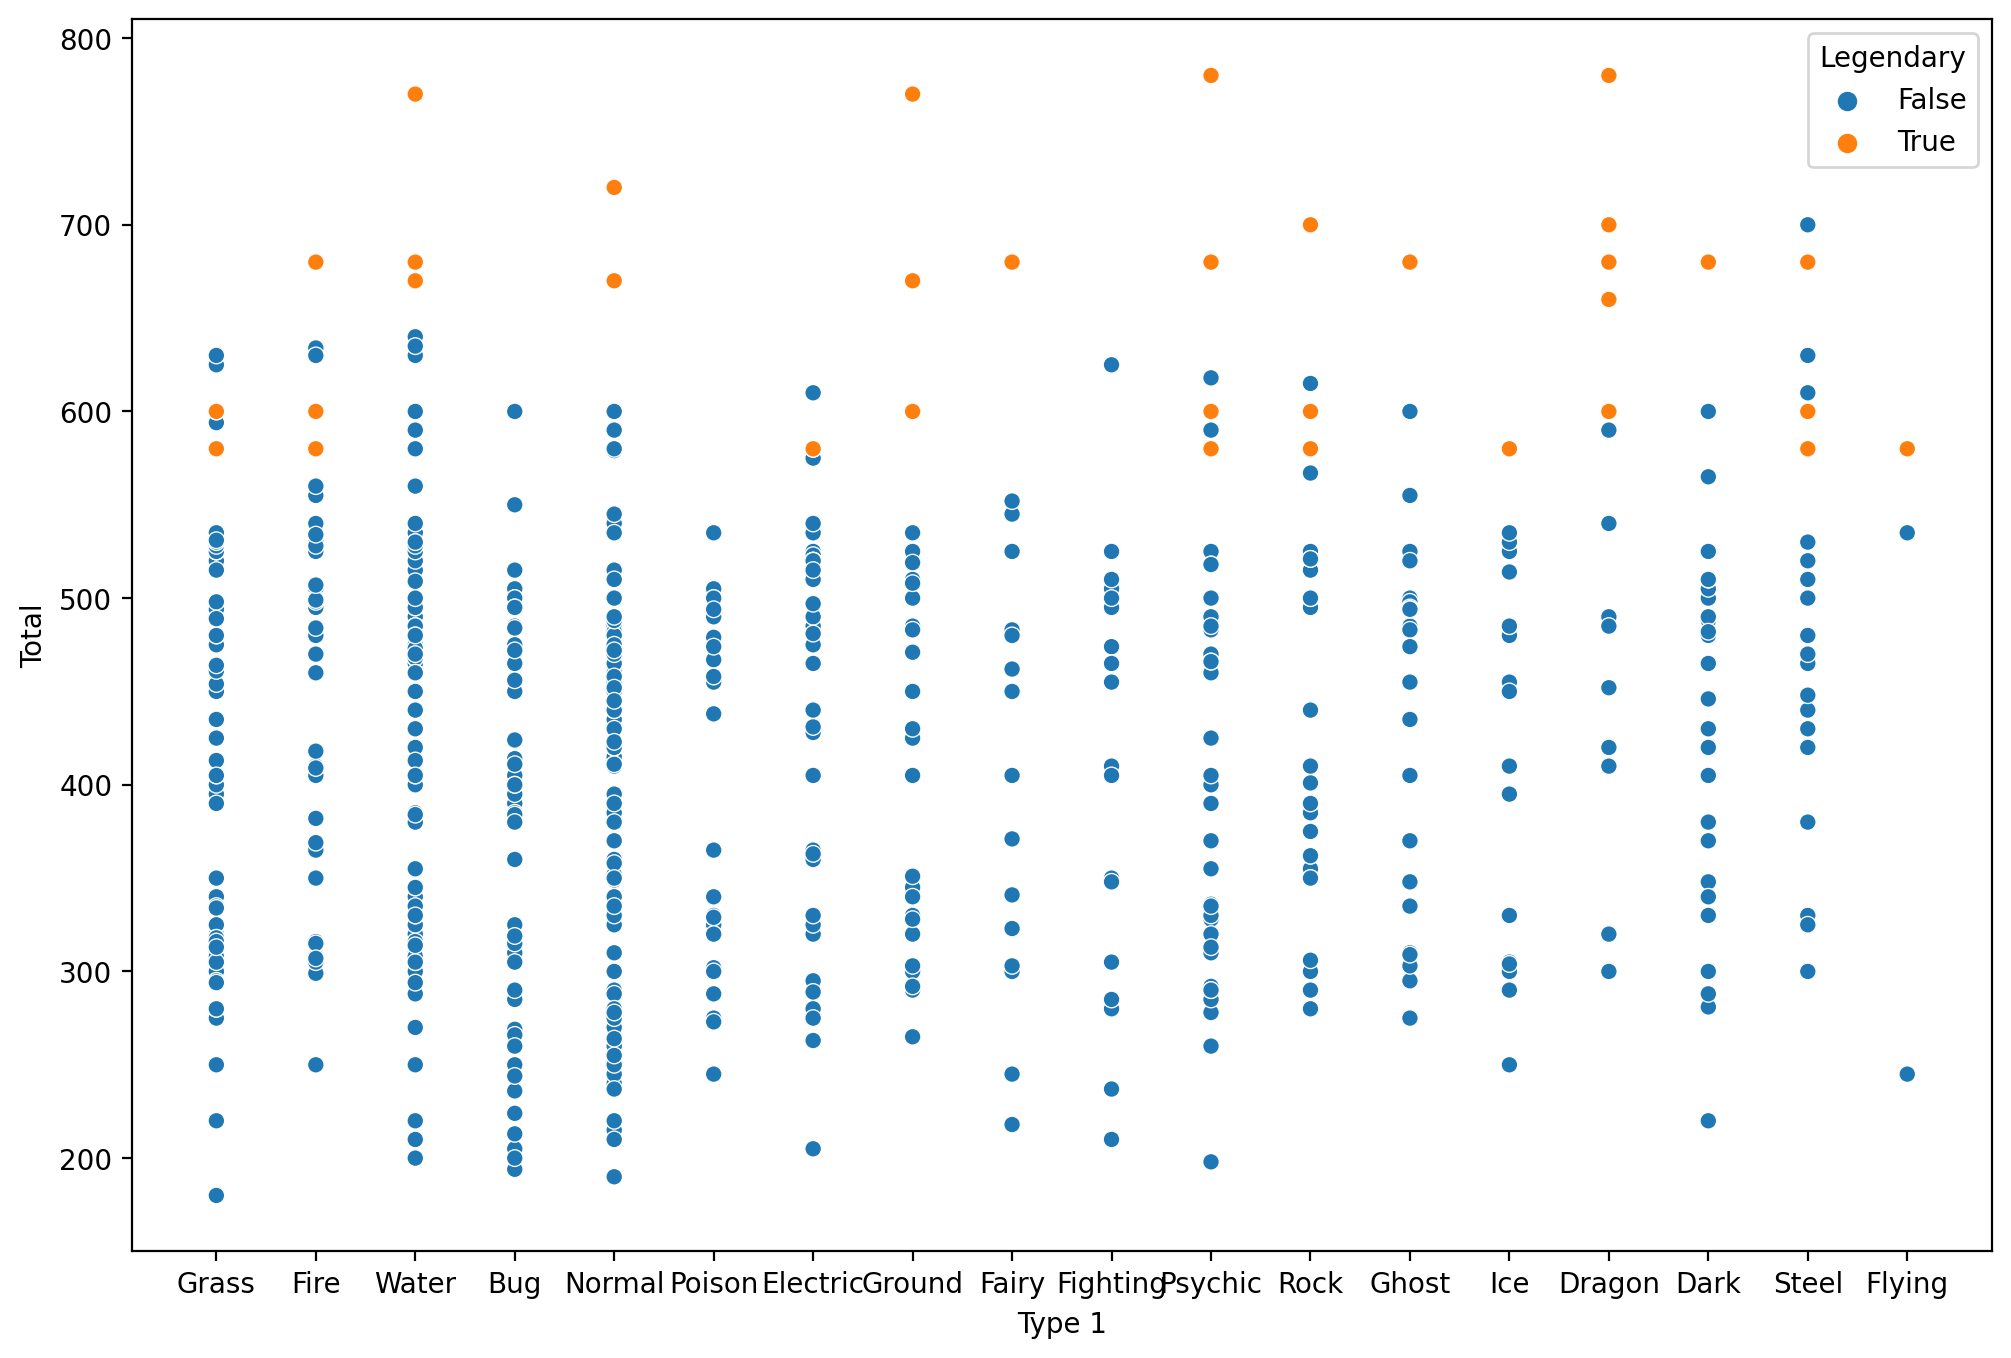

In [68]:
# 'Total'값과 'Legendary'는 어떤 관계가 있을지 확인
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

 - 위 그래프를 보면 `Type 1`별로 `Total`값을 확인했을 때, 전설의 포켓몬은 주로 `Total`스탯 값이 높다는 것을 확인할 수 있다.

---

  5. 세부 스탯
    - 세부스탯**:** `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`

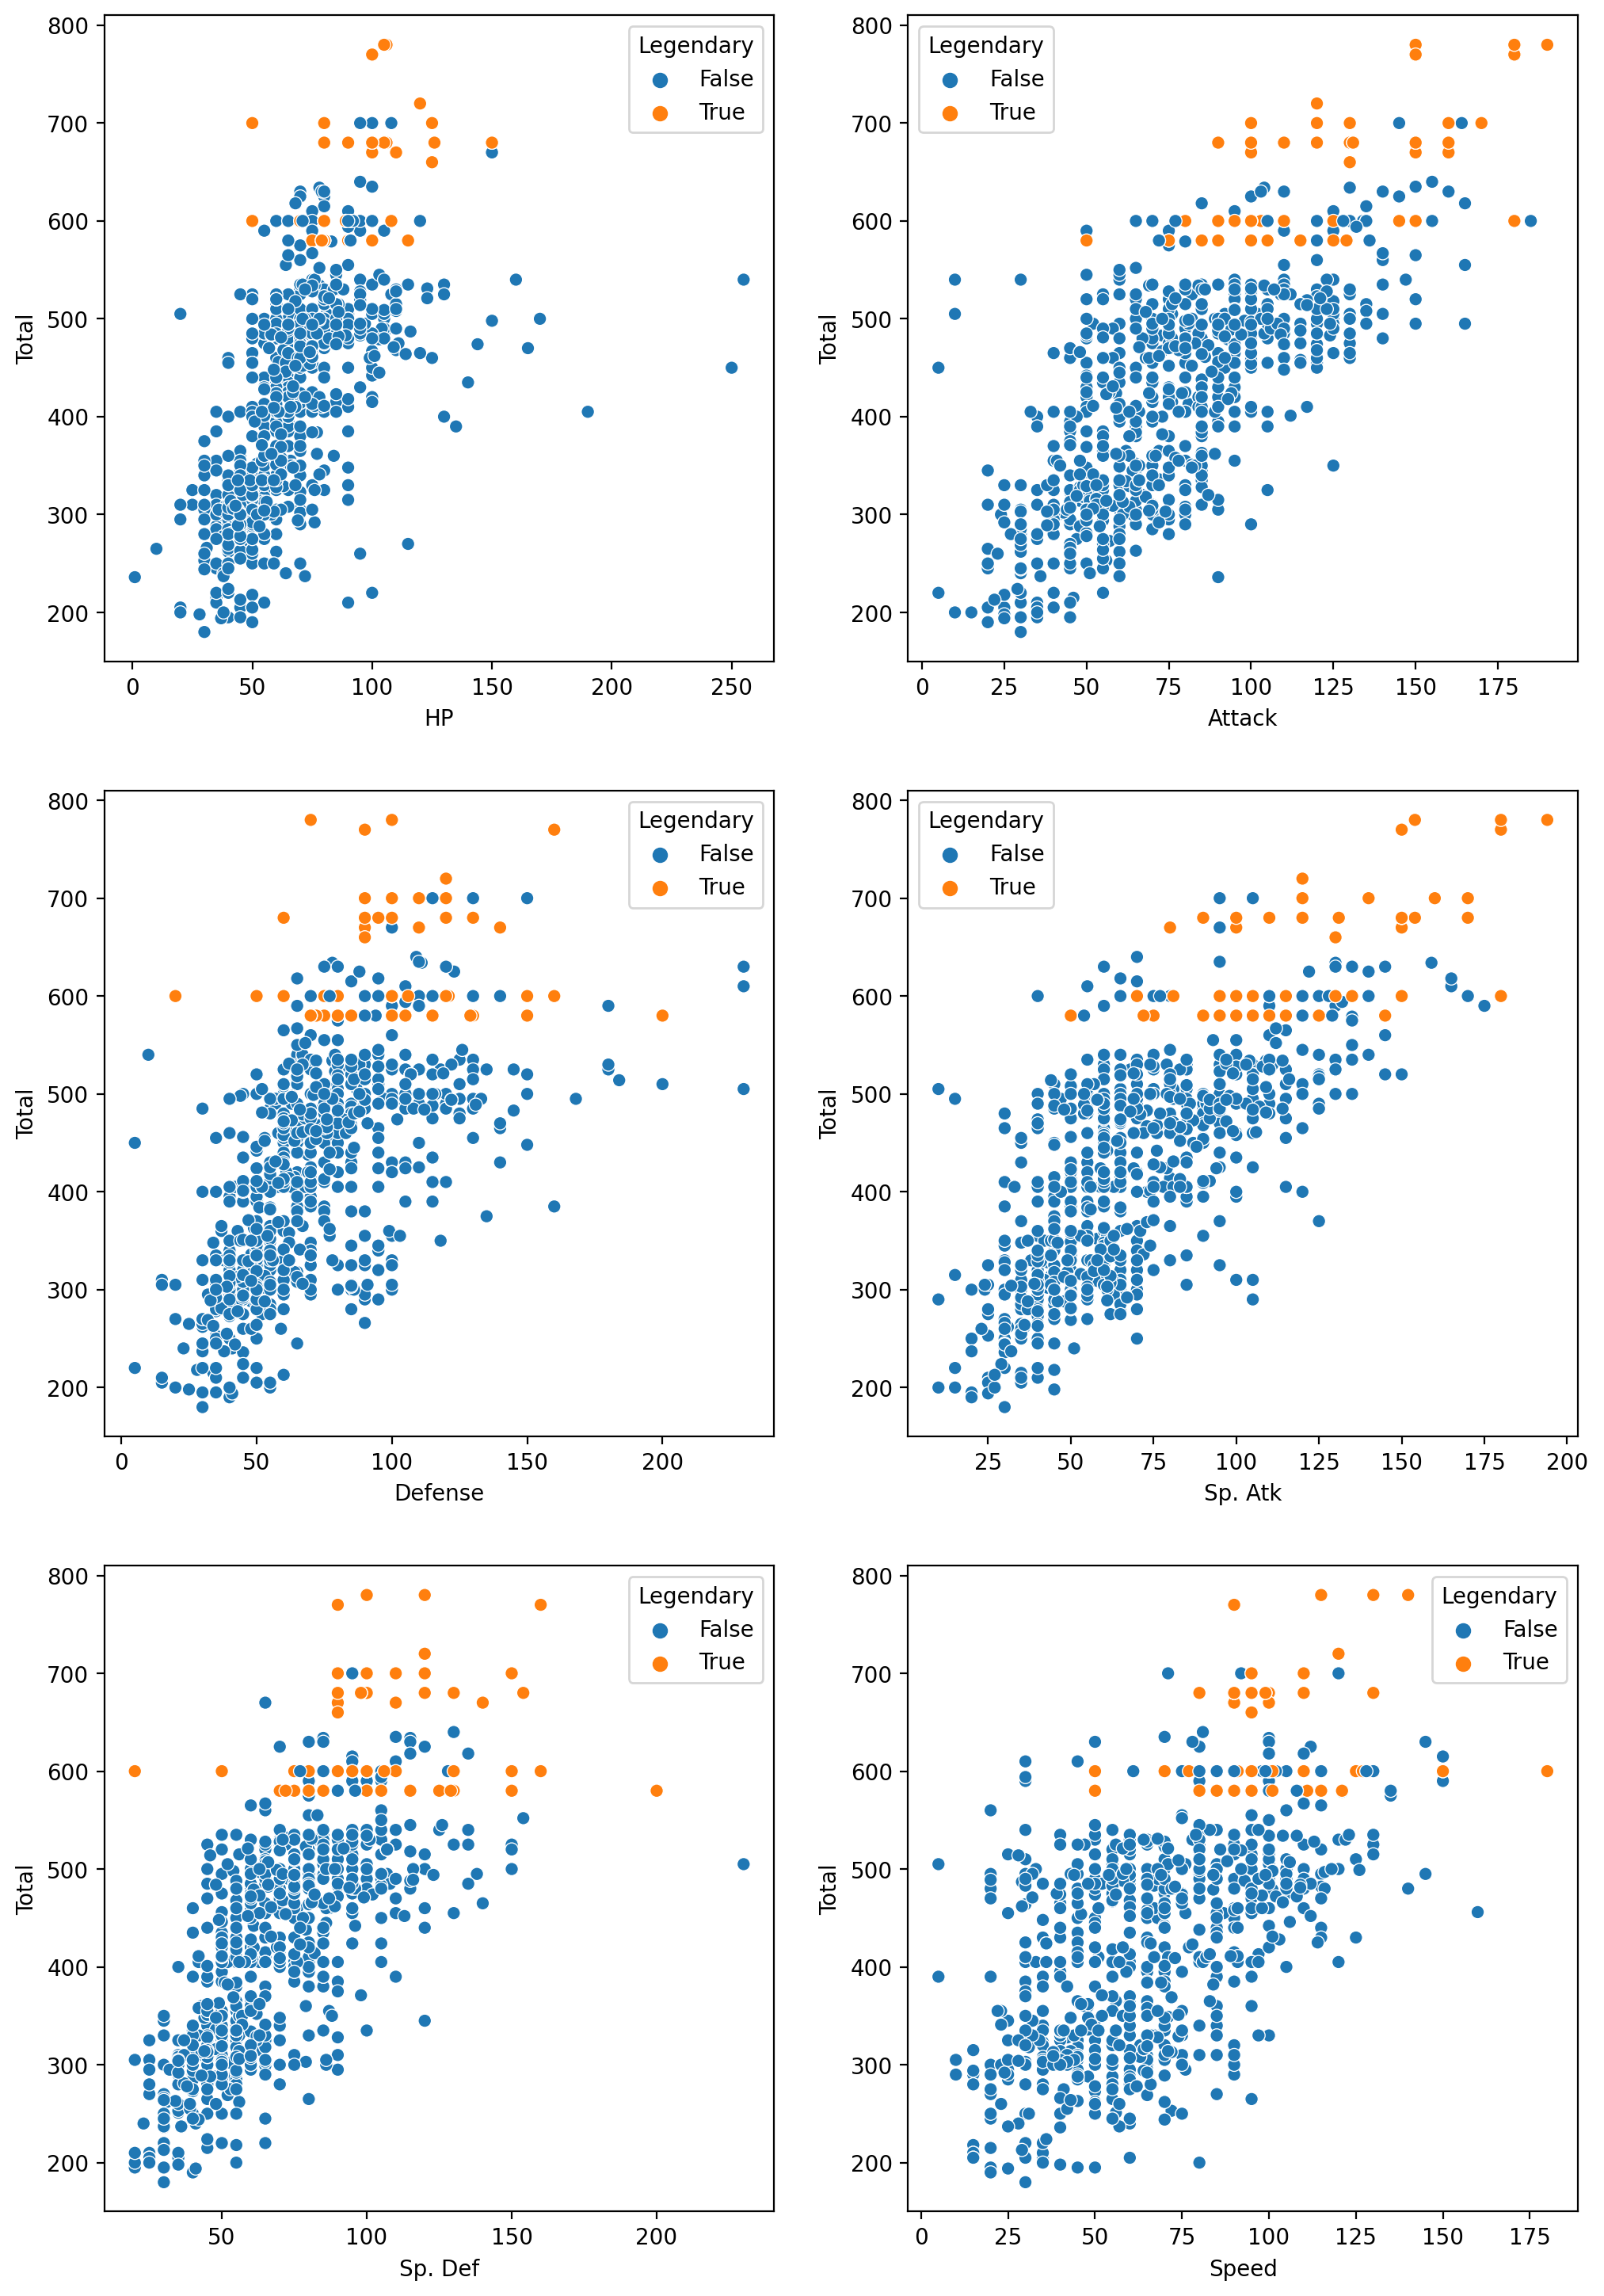

In [70]:
# 각각의 스탯밧은 어떻게 분포되어 있을지 확인
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

 - 위 그래프는 각각의 스탯 값이 어떻게 분포되어 있을지 나타낸다.

---

  6. 세대
    - `Generation` **:** 포켓몬의 세대

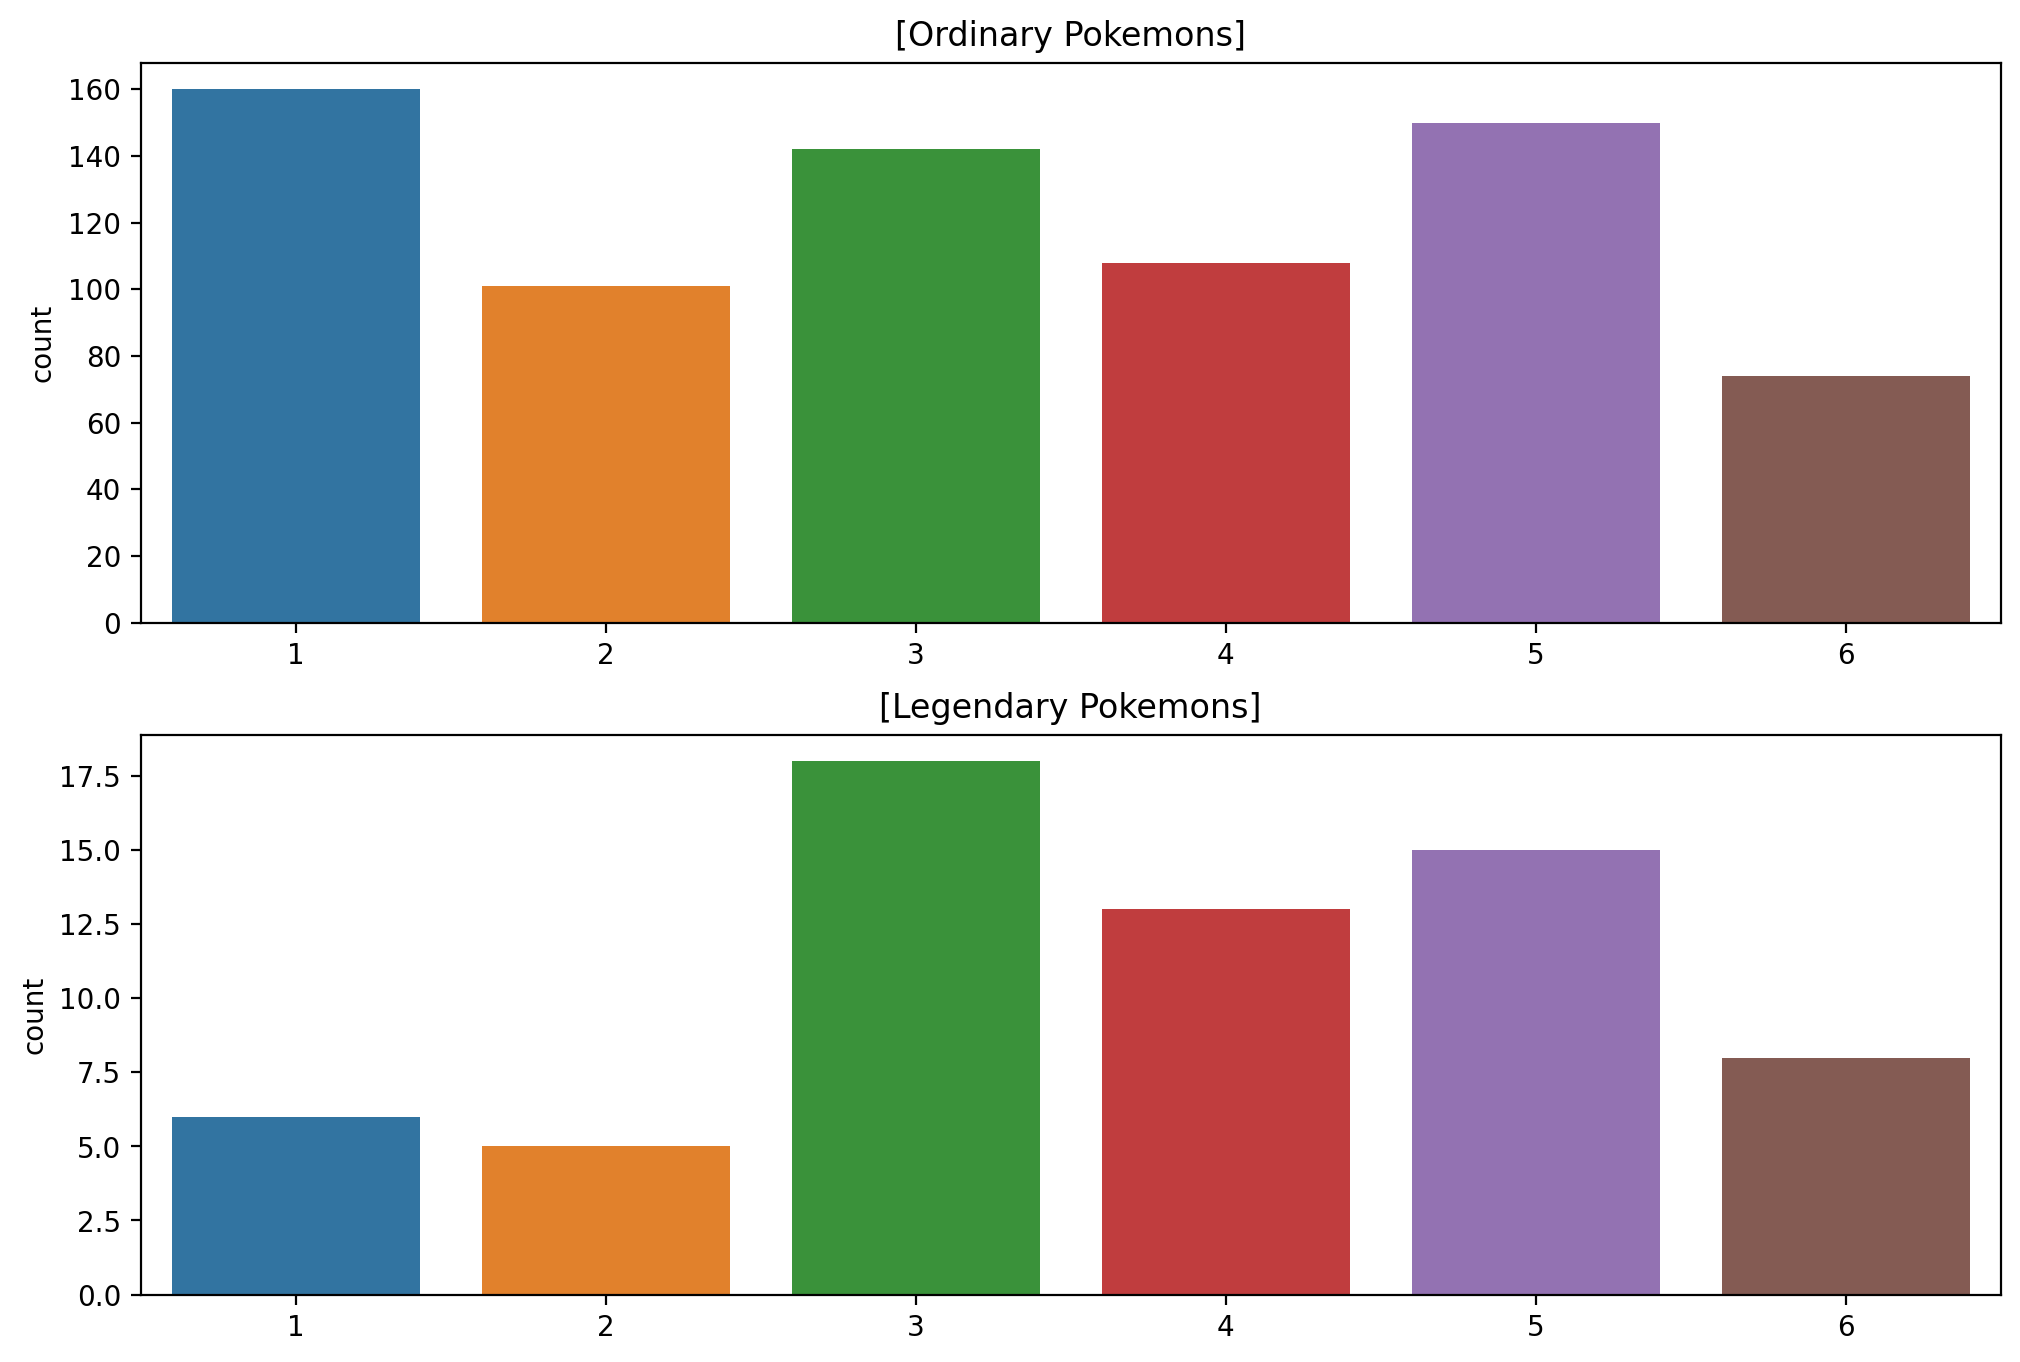

In [71]:
# 각 세대에 대한 포켓몬의 수를 확인 ('Generation': 포켓몬의 세대)
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

 - 위 그래프를 보면 전설의 포켓몬은 1, 2세대에는 많지 않았다가 3 ~ 5세대까지 많아졌다가, 다시 6세대부터 줄어든 것을 확인할 수 있다.

---

### 3. 데이터 살펴보기
  1. 데이터 차이점 확인하기
    - 전설의 포켓몬의 Total값

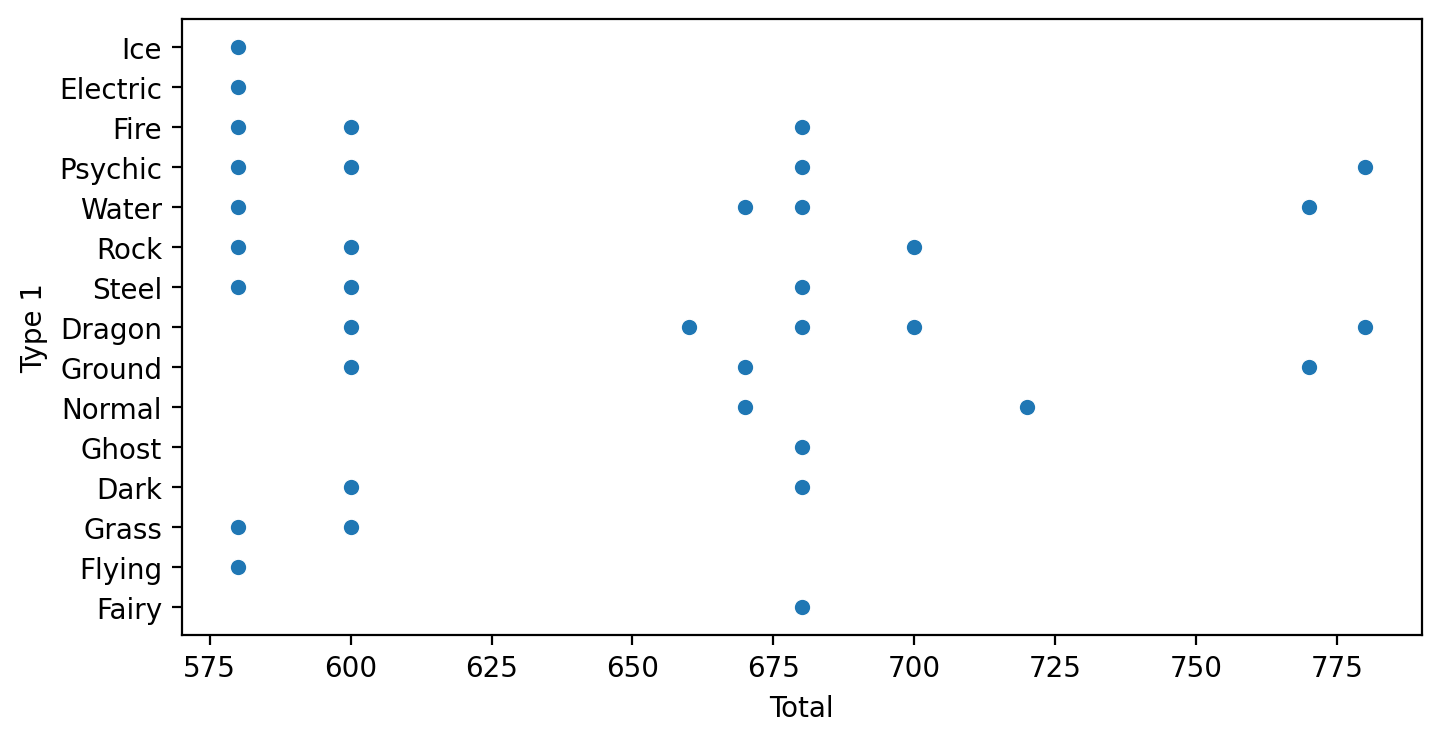

In [136]:
# 'Legendary' 포켓몬과 'Oridinary' 포켓몬을 분리해서 각각 분석해본다.
# 전설의 포켓몬들의 'Total'값을 속성'Type 1' 별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

 - 전설의 포켓몬들의 `Total`값들이 600과 같은 특정한 값에 몰려있는것이 확인이 된다.

In [137]:
# 실제로 전설의 포켓몬이 가지는 'Total'값들의 집합을 확인
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


 - 실제로는 단 9가지만 존재하는걸 확인할 수 있다.

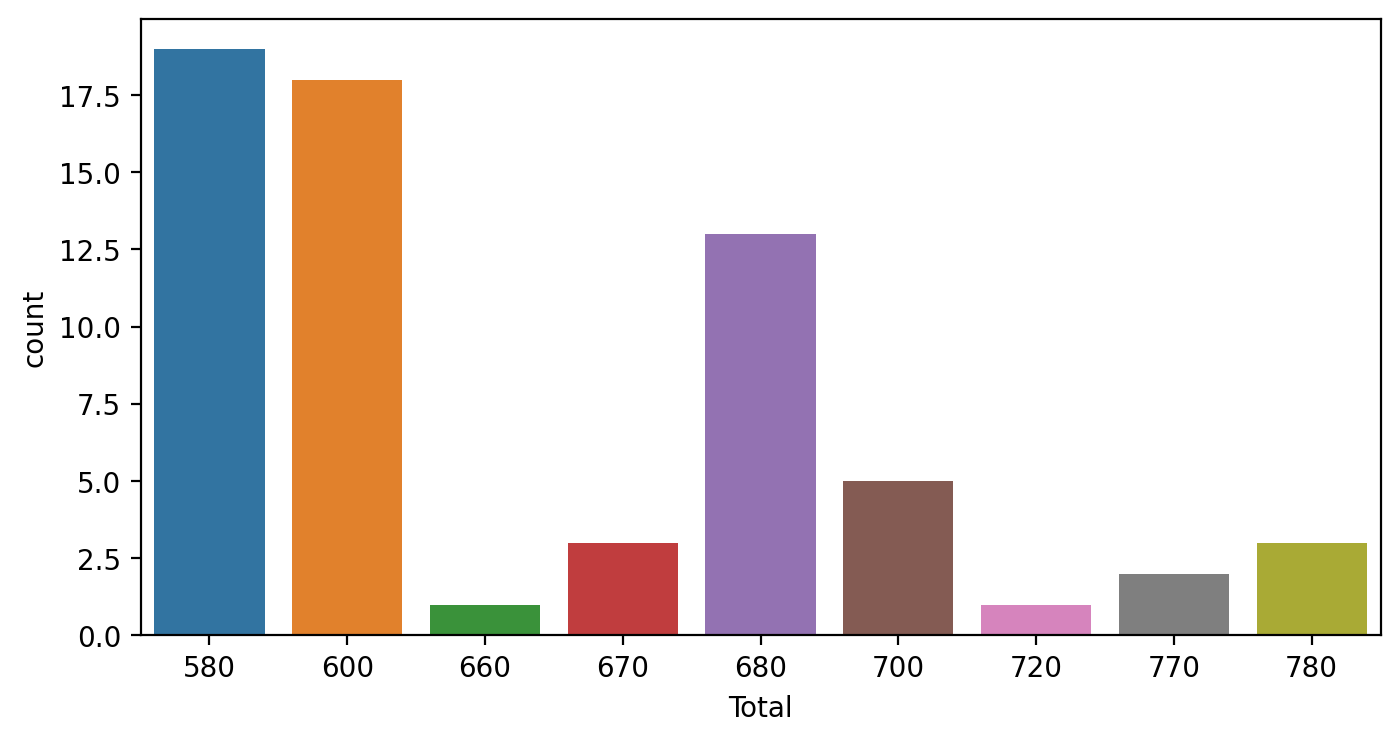

In [138]:
# 그래프로 전설의 포켓몬이 가지는 각 'Total'값에 대한 포켓몬 수를 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [139]:
# 총 65마리의 전설의 포켓몬이 9개의 'Total'값만 가진다는 내용을 확인
round(65 / 9, 2)

7.22

 - 총 65마리의 전설의 포켓몬이 9개의 `Total`값만 가진다는 것은 약 7.22마리 끼리는 같은 `Total`스탯값을 가진다는 의미와 같다.

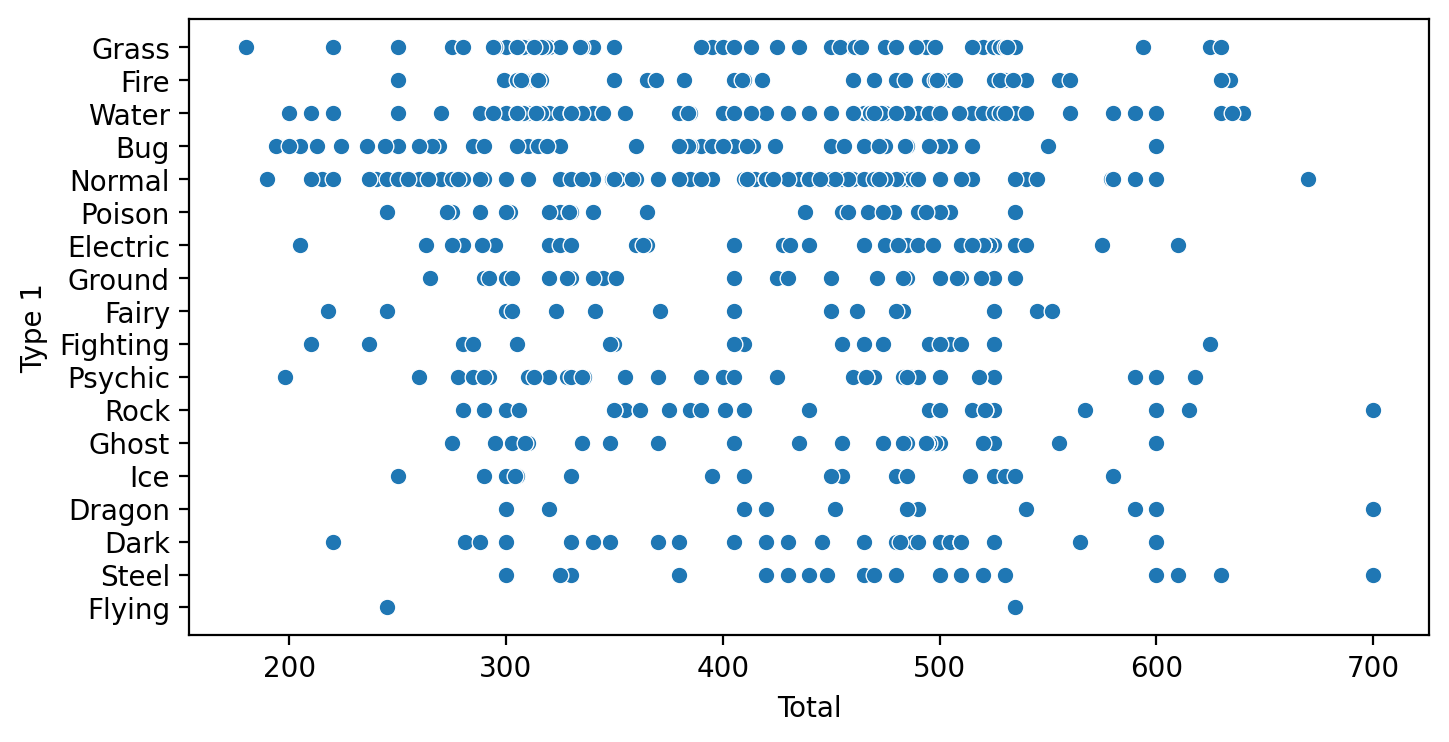

In [140]:
# 일반 포켓몬들의 'Total'값을 속성'Type 1' 별로 확인
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [141]:
# 실제로 일반 포켓몬이 가지는 'Total'값들의 집합을 확인 (길이)
print(len(sorted(list(set(ordinary["Total"])))))

195


In [142]:
# 총 735마리의 전설의 포켓몬이 195개의 'Total'값만 가진다는 내용을 확인
round(735 / 195, 2)

3.77

 - 일반 포켓몬은 총 195가지의 Total 속성값을 가지고, 전체 일반 포켓몬은 (800 - 65), 즉 735마리이므로, 약 3.77마리만 같은 Total 스탯 값을 가지는 것을 볼 수 있다.

 - 여기까지 확인하며 2가지를 알 수 있다.  
  
  1. Total값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.한 포켓몬의 Total 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미친다.

  2. 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재합니다. ex) 680, 720, 770, 780
  Total값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있다.

---

  2. 데이터 차이점 확인하기
    - 전설의 포켓몬의 이름

In [143]:
# 특정 단어가 들어가 있는 이름이 많은지 확인
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,19
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True,6
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True,17
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True,6
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True,17
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True,6
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,19
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True,7


 - 이름들이 비슷한 경향을 띠는 것을 볼 수 있다.   
 - 전설의 포켓몬 사이에서는 비슷한 이름이 다수 존재하는 걸 확인할 수 있다.

In [144]:
# 또는 이름에 forme가 들어가는 여러 가지 전설의 포켓몬이 있는 경우도 확인
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True,18
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,18
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True,19
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True,17
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True,23
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True,21
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True,24
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True,22
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True,23
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True,21


In [145]:
# 데이터셋에 이름 길이 컬럼을 생성해서 비교 (전설의 포켓몬)
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [146]:
# 데이터셋에 이름 길이 컬럼을 생성해서 비교 (일반 포켓몬)
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


 - 데이터셋에 이름 길이 컬럼을 생성해서 비교를 해본다. (전설의 포켓몬, 일반 포켓몬)

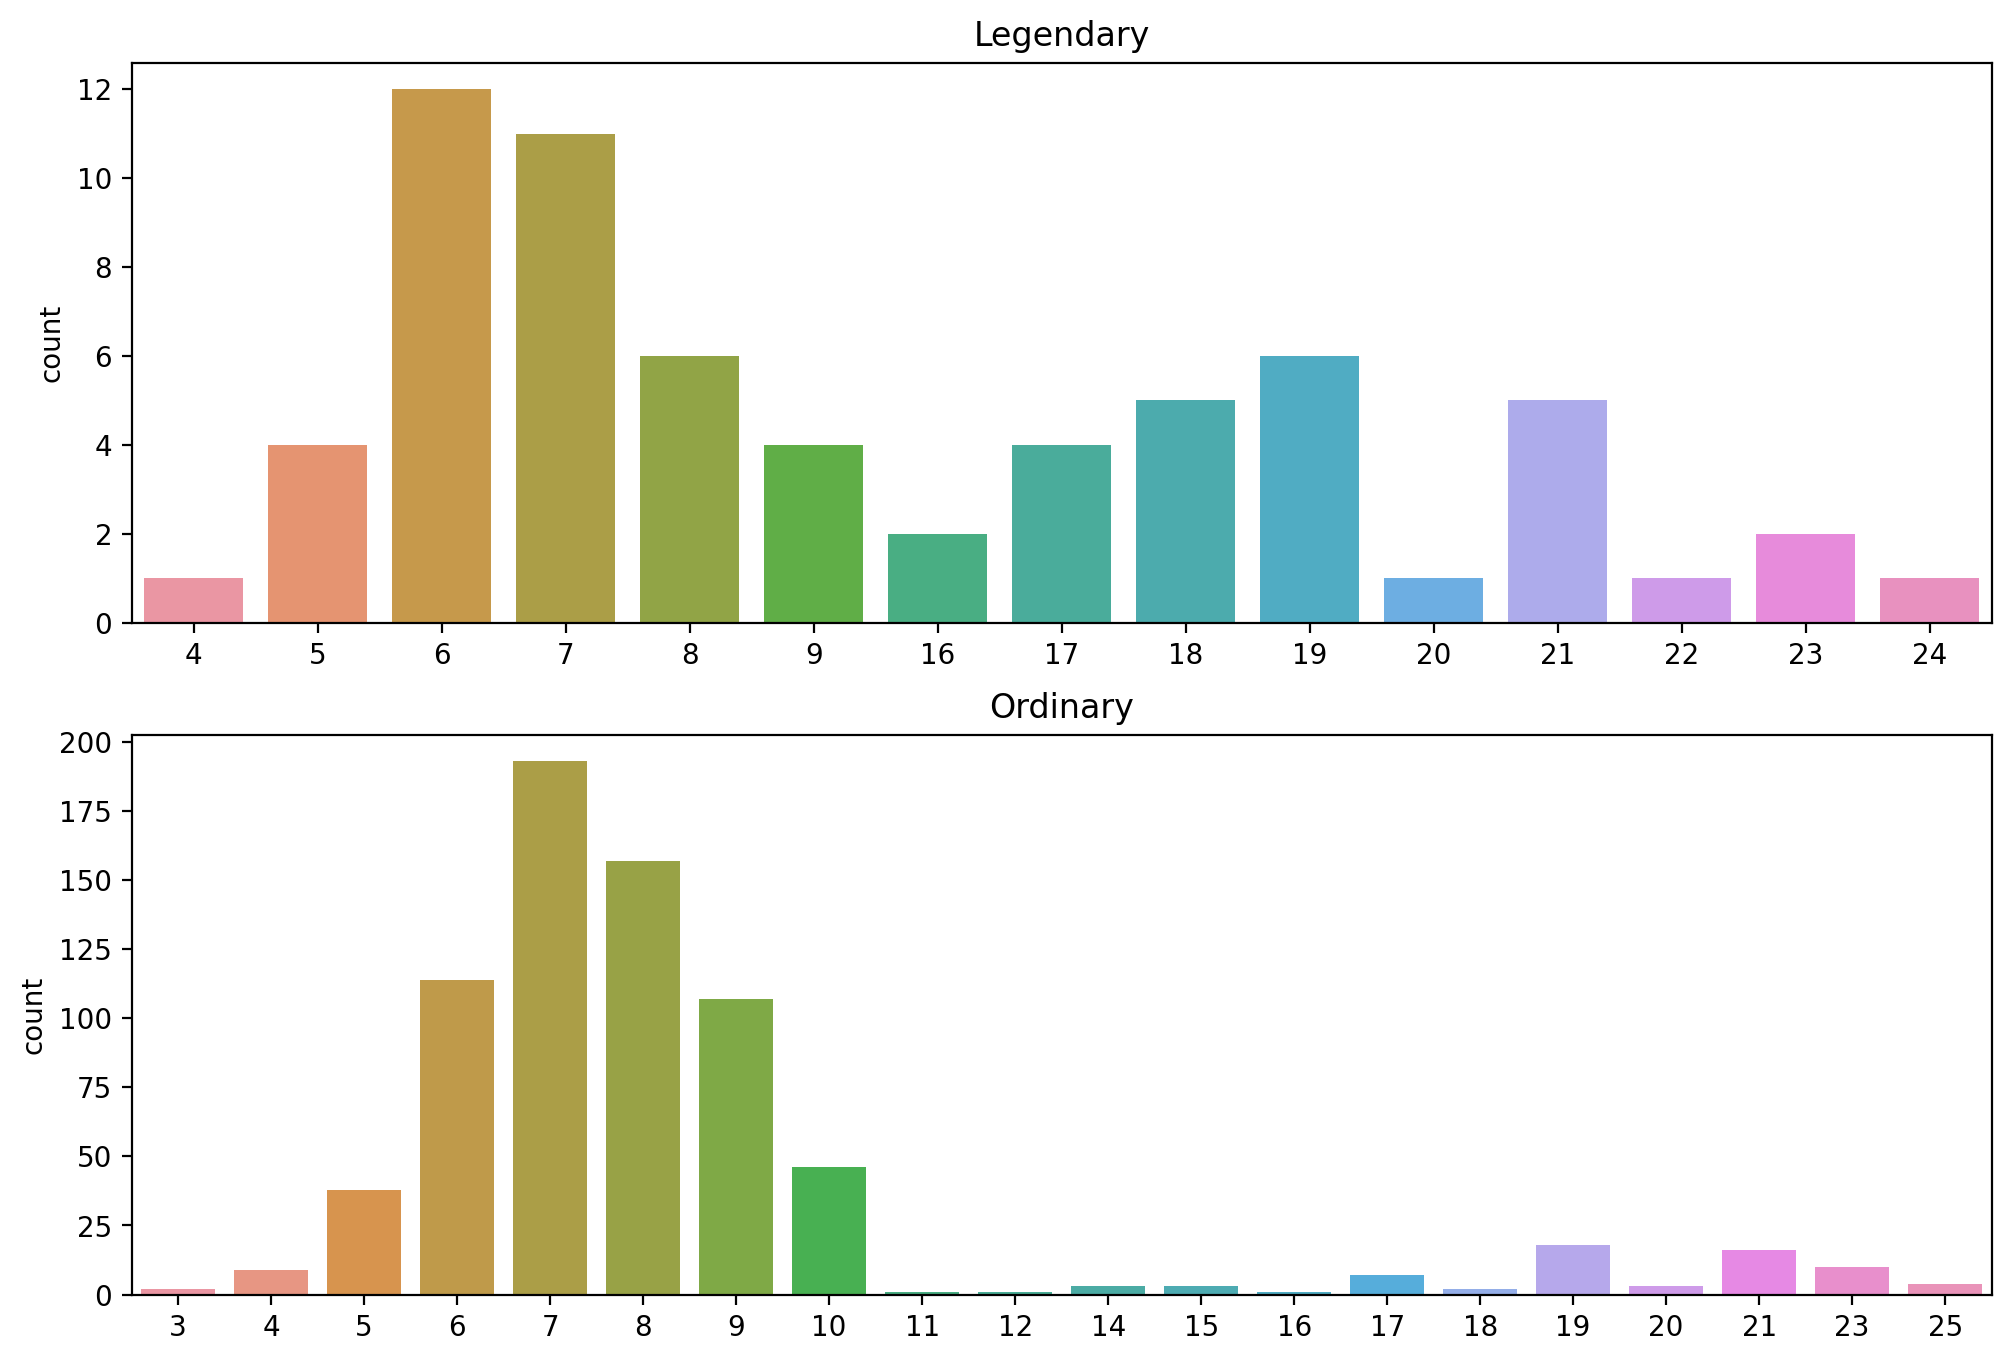

In [147]:
# name_count 컬럼은 어떤 특징을 갖게 되는지 그래프로 확인
plt.figure(figsize=(12, 8))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

 - `name_count` 컬럼은 어떤 특징을 갖게 되는지 그래프로 확인해 볼 수 있다.

In [148]:
# 전설의 포켓몬의 이름이 10글자 이상일 확률은 어느 정도가 될지 확인
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [149]:
# 일반 포켓몬의 이름이 10글자 이상일 확률은 어느 정도가 될지 확인
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


 - 위 두 코드는 포켓몬의 이름이 10글자 이상일 때 확률을 나타낸다.

---

### 4. 데이터 전처리하기
  1. 이름의 길이가 10 이상인가?
    - 이름의 길이가 10 이상인가 아닌가

In [150]:
# 이름의 길이를 확인할 수 있는 'name_count' 컬럼을 생성하고 전체 데이터가 있는 pokemon 데이터 프레임을 생성한다.
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,True,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,True,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,True,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,True,False,False,False,False,False


In [151]:
# 또한 이름의 길이가 10글자 이상이면 True, 미만이면 False를 가지를 'long_name'컬럼도 생성한다.
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,True,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,True,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,True,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,True,False,False,False,False,False


---

  2. 이름에 자주 쓰이는 토큰 추출
    - 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기

In [152]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,False,False,False,False,False,True,False,False,False,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,False,False,False,False,False,True,False,False,False,False
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,False,False,False,False,False,False,False,False,False,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,False,False,False,False,False,False,False,False,False,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,...,False,False,True,False,True,False,False,False,False,False


In [153]:
# 'isalpha()' 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,True,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,True,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,True,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,True,False,False,False,False,False


In [154]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 것을 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 45)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic


In [155]:
# 알파벳이 아닌 포켓몬이 9마리이다. 직접 바꿔보자.
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,...,False,True,False,False,False,False,False,False,False,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,...,False,True,False,False,False,False,False,False,False,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,...,False,False,False,False,False,False,False,False,False,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,...,False,False,False,False,False,True,False,False,False,True
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,...,False,False,False,False,False,False,False,False,False,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,...,False,False,False,False,True,False,False,False,False,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,...,False,False,False,False,False,True,False,False,False,True
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,...,False,False,False,False,False,False,False,False,False,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,...,False,False,False,False,False,False,True,False,False,False


In [156]:
# 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해보기.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())

In [157]:
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic


 - 알파벳이 아닌 다른 문자가 이름에 포함된 것을 확인하고 없어진 것을 볼 수 있다.

In [158]:
# 이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화 하기
# 정규표현식을 사용하여 표현해 보자.
import re
def tokenize(name):
  name_split = name.split(" ")
  tokens = []
  for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
  return np.array(tokens)

In [159]:
# 함수를 이용해서 간단한 코드로 이름을 토크화 해보기
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [160]:
# 이제 전설의 포켓몬 데이터셋에 적용시켜서, 전설의 포켓몬의 이름에 사용된 토큰을 모아보자.
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [161]:
# 이 중 토큰이 사용된 개수를 알아야 하기 때문에 'Counter객체를 사용해보자.
from collections import Counter

# 'most_common()'함수를 사용해 가장 많은 요소와 등장 횟수가 무엇인지 정렬해보자
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [162]:
# 전설으 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들어보자
# 'str.contains' 함수로 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부를 알 수 있다.
for token, _ in most_common:
  pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,True,True,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,True,True,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,True,True,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,True,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,True,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,True,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,True,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,False,False,False,True,False,True,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,False,False,False,True,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,True,False,False,False,False,False,False,False


---

### 5. 모델 학습
  1. 가장 기본 데이터로 만드는 베이스라인


In [163]:
# 범주형 데이터인 'Type'컬럼을 전처리 해보기
# 18가지의 모든 Type을 모두 원-핫 인코딩(One-Hot Encoding)으로 처리

# EDA 단계에서 만들었던 모든 Type의 리스트를 다시 확인해보자
print(types)

['Ice', 'Normal', 'Ground', 'Rock', 'Ghost', 'Steel', 'Flying', 'Dark', 'Grass', 'Poison', 'Water', 'Bug', 'Fire', 'Fairy', 'Dragon', 'Fighting', 'Electric', 'Psychic']


In [164]:
# 18개의 컬럼에 대해 원-핫 인코딩으로 진행
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ice,Normal,Ground,Rock,Ghost,Steel,Flying,Dark,Grass,Poison,Water,Bug,Fire,Fairy,Dragon,Fighting,Electric,Psychic
0,Grass,Poison,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [165]:
# 가장 기본 데이터로 만드는 베이스라인(Baseline)

print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [166]:
# 데이터로 베이스라인 모델에 넣기 전, 문자열 데이터는 빼주어야 한다.
# 컬럼을 확인해보자
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [167]:
# 의미 없는 컬럼과 문자열데이터는 제외하고 사용해보자.
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [168]:
# 'target' 데이터인 'Legendary'도 변수에 저장해보자
target = 'Legendary'

In [169]:
# "X" 변수에 'features'컬럼에 해당하는 데이터를 담아보자.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [170]:
# "y"변수에 'target'컬럼을 담아보자
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [171]:
# 훈련 데이터와 학습 데이터로 분리해보기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


---

  2. 의사 결정 트리 모델 학습시키기

In [172]:
# 의사 결정 트리를 사용하여 모델 학습시키기
from sklearn.tree import DecisionTreeClassifier

# 모델의 랜덤성을 제어해보자
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [173]:
# 모델 학습시키기
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [174]:
# 학습한 모델을 가지고 채점해보기
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

In [175]:
# 정확도 외에 다른 척도로 모델의 성능을 평가해보자
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



---

  3. 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [176]:
# 작업했던 모든 컬럼을 한번 확인해 보자
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ice', 'Normal', 'Ground', 'Rock', 'Ghost', 'Steel', 'Flying', 'Dark',
       'Grass', 'Poison', 'Water', 'Bug', 'Fire', 'Fairy', 'Dragon',
       'Fighting', 'Electric', 'Psychic'],
      dtype='object')


- 위 컬럼들 중 제외해야할 컬럼들은 무엇이 있을까?
 - "#" : 인덱스를 의미해서 제외
 - "Name" : 문자열데이터로 전처리를 통해 대체되었으므로 제외
 - "Type 1" &"Type 2" : 해당속성은 원-핫인코딩 되었기에 제외
 - "Name_nospce", "name_isalpha" : 전처리를 위해 필요한 컬럼으로 분류 분석에서는 제외
 - "Legendary" : target데이터이므로 제외

In [177]:
# 위 컬럼들을 제외 후 사용할 컬럼들만 추려서 'feature'라는 변수에 저장해보자
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [178]:
# 전설의 포켓몬인지 아닌지의 여부를 나타내는 'Legendary'를 'target'변수에 저장해보자
target = "Legendary"
target

'Legendary'

In [179]:
# 모델에 입력해 줄 진짜 데이터 'X' 변수에 저장해보자
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [180]:
# 정답 데이터 'y'도 'target'변수를 이용해 만들어주자
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [181]:
# 이번에도 'X_train'부터 'y_test'까지로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


  4. 의사 결정 트리 모델 다시 학습시키기

In [182]:
# 이번에도 의사 결정 트리를 활용해 학습해본다.
model = DecisionTreeClassifier(random_state=25)
model

# train 데이터로 decision tree 모델을 학습
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# confusion matrix 확인
confusion_matrix(y_test, y_pred)

# classification report도 확인
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



### 6. 회고
 - 두번째 Main Quest를 진행하며 크게 어려움은 없었다. 하지만 최대한 이해하면서 진행을 하니 시간이 너무 촉박하여 정리부분이 미흡했다. 다음 Quest를 진행한다면 시간배분을 잘 해야할 것 같다.
